In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
import re

In [3]:
sales = pd.read_csv('../data/interim/sales_train_etl.csv')
shops = pd.read_csv('../data/interim/shops_etl.csv')
items = pd.read_csv('../data/interim/items_etl.csv')
item_cat = pd.read_csv('../data/interim/item_categories_etl.csv')

In [4]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,01.01.2013,0,2,991,99.0,1.0
1,01.01.2013,0,2,1472,2599.0,1.0
2,01.01.2013,0,2,1905,249.0,1.0
3,01.01.2013,0,2,2920,599.0,2.0
4,01.01.2013,0,2,3320,1999.0,1.0


### Sales - date and date block

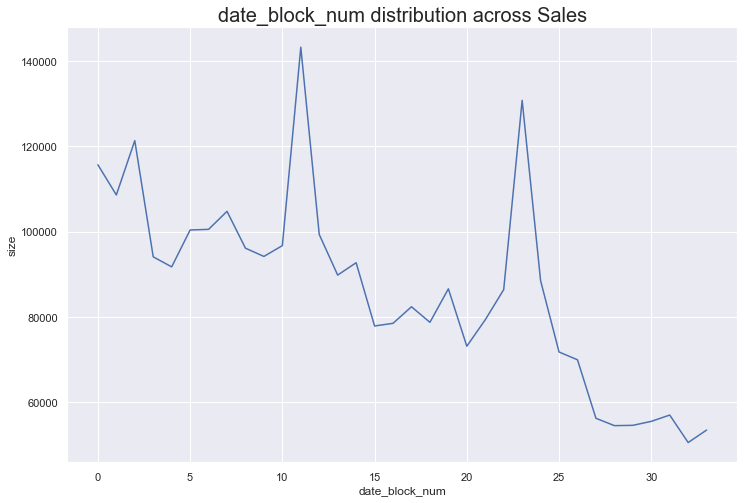

In [13]:
sns.lineplot(data=sales.groupby(['date_block_num'], as_index=False).size(), x='date_block_num', y='size')
plt.title('date_block_num distribution across Sales', fontsize=20);

По количеству продаж в каждый месяц наблюдается общий тренд на снижение, но есть пики на значениях *11* и *23* - эти значения соответсвуют декабрю. Еще можно заметить небольшие подъемы на значениях, соответсвующих августу и марту.

Проанализируем по остальным месяцам и дням недели:

In [25]:
sales['date'] = pd.to_datetime(sales['date'], format="%d.%m.%Y")

sales['month'] = sales['date_block_num'] % 12 + 1
sales['year'] = sales['date'].dt.year
sales['day_of_week'] = sales['date'].dt.dayofweek

#### Month

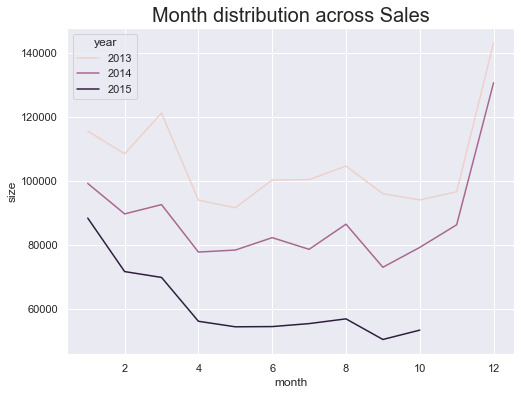

In [26]:
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(data=sales.groupby(['month', 'year'], as_index=False).size(), x='month', y='size', hue='year')
plt.title('Month distribution across Sales', fontsize=20);

#### Day of week

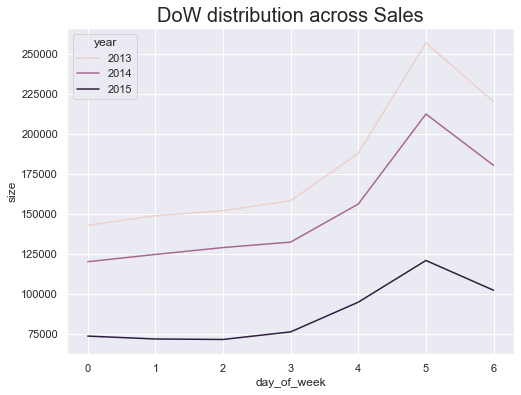

In [27]:
sns.lineplot(data=sales.groupby(['day_of_week', 'year'], as_index=False).size(), x='day_of_week', y='size', hue='year')
sns.set(rc={'figure.figsize':(6,4)})
plt.title('DoW distribution across Sales', fontsize=20);

Больше всего покупок совершают на выходных.

### shops and items

In [21]:
sales_merged = sales.merge(shops, on='shop_id').merge(items, on='item_id').merge(item_cat, on='item_category_id')

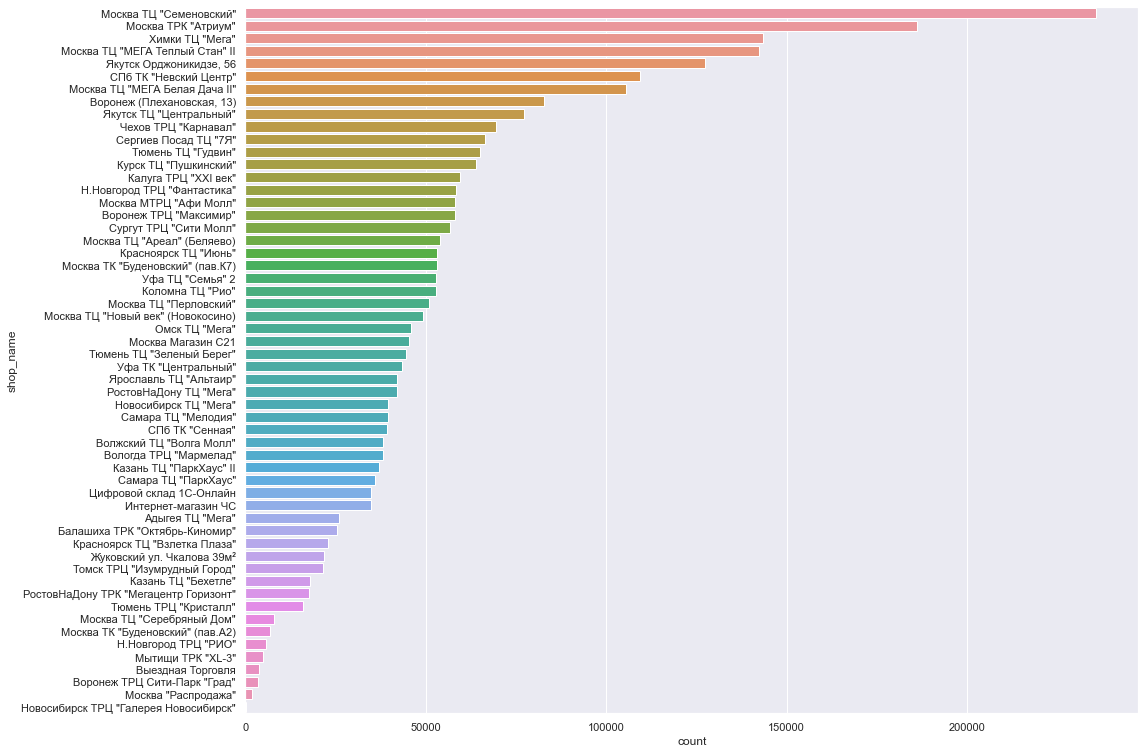

In [31]:
sns.set(rc={'figure.figsize':(16,13)})
sns.countplot(data=sales_merged, y="shop_name", order = sales_merged['shop_name'].value_counts().index);

Посмотрим на динамику продаж в разных магазинах.

(0.0, 34.0)

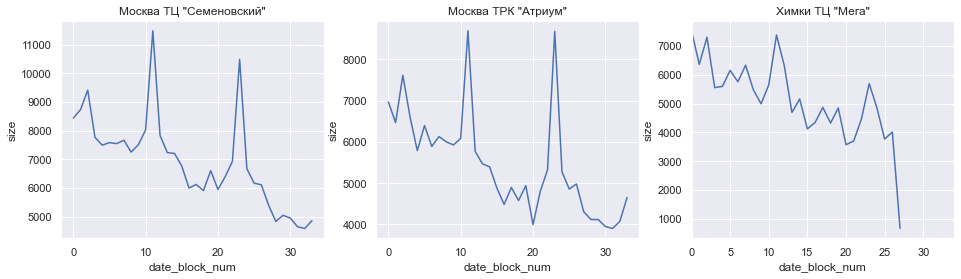

In [45]:
sns.set(rc={'figure.figsize':(16,4)})
fig, axs = plt.subplots(ncols=3)
sns.lineplot(data=sales_merged[sales_merged['shop_name'] == 'Москва ТЦ "Семеновский"'].groupby(['date_block_num'], as_index=False).size(), x='date_block_num', y='size', ax=axs[0])
axs[0].set_title('Москва ТЦ "Семеновский"')
sns.lineplot(data=sales_merged[sales_merged['shop_name'] == 'Москва ТРК "Атриум"'].groupby(['date_block_num'], as_index=False).size(), x='date_block_num', y='size', ax=axs[1])
axs[1].set_title('Москва ТРК "Атриум"')
sns.lineplot(data=sales_merged[sales_merged['shop_name'] == 'Химки ТЦ "Мега"'].groupby(['date_block_num'], as_index=False).size(), x='date_block_num', y='size', ax=axs[2])
axs[2].set_title('Химки ТЦ "Мега"');
axs[2].set_xlim([0,34])

Мы видим, что у первых двух магазинов динамика схожая, а вот у *Химки ТЦ "Мега"* к 24-25 месяцу продажи резко падают, а зачем вовсе обрываются.

Рассмотрим еще несколько динамик магазина, а затем исследуем, в каких магазинах и когда обрываются данные.

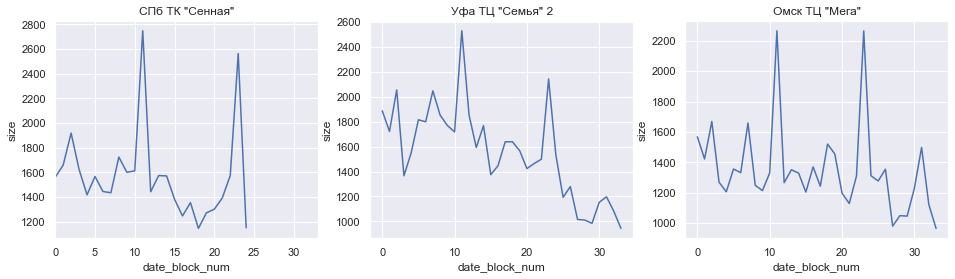

In [42]:
sns.set(rc={'figure.figsize':(16,4)})
fig, axs = plt.subplots(ncols=3)
sns.lineplot(data=sales_merged[sales_merged['shop_name'] == 'СПб ТК "Сенная"'].groupby(['date_block_num'], as_index=False).size(), x='date_block_num', y='size', ax=axs[0])
axs[0].set_title('СПб ТК "Сенная"')
axs[0].set_xlim([0,34])
sns.lineplot(data=sales_merged[sales_merged['shop_name'] == 'Уфа ТЦ "Семья" 2'].groupby(['date_block_num'], as_index=False).size(), x='date_block_num', y='size', ax=axs[1])
axs[1].set_title('Уфа ТЦ "Семья" 2')
sns.lineplot(data=sales_merged[sales_merged['shop_name'] == 'Омск ТЦ "Мега"'].groupby(['date_block_num'], as_index=False).size(), x='date_block_num', y='size', ax=axs[2])
axs[2].set_title('Омск ТЦ "Мега"');

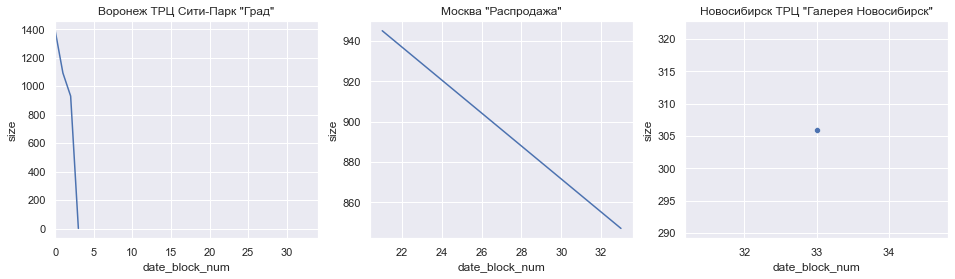

In [50]:
sns.set(rc={'figure.figsize':(16,4)})
fig, axs = plt.subplots(ncols=3)
sns.lineplot(data=sales_merged[sales_merged['shop_name'] == 'Воронеж ТРЦ Сити-Парк "Град"'].groupby(['date_block_num'], as_index=False).size(), x='date_block_num', y='size', ax=axs[0])
axs[0].set_title('Воронеж ТРЦ Сити-Парк "Град"')
axs[0].set_xlim([0,34])
sns.lineplot(data=sales_merged[sales_merged['shop_name'] == 'Москва "Распродажа"'].groupby(['date_block_num'], as_index=False).size(), x='date_block_num', y='size', ax=axs[1])
axs[1].set_title('Москва "Распродажа"')
sns.scatterplot(data=sales_merged[sales_merged['shop_name'] == 'Новосибирск ТРЦ "Галерея Новосибирск"'].groupby(['date_block_num'], as_index=False).size(), x='date_block_num', y='size', ax=axs[2])
axs[2].set_title('Новосибирск ТРЦ "Галерея Новосибирск"');

In [70]:
shop_dyn = sales_merged.groupby(['shop_id','shop_name']).agg({'date': ['min', 'max']})
shop_dyn.columns = shop_dyn.columns.droplevel()

In [73]:
shop_dyn.rename({'min': 'start_date', 'max': 'end_date'},axis=1,inplace=True)
shop_dyn.reset_index()

,shop_id,shop_name,start_date,end_date
0,2,"Адыгея ТЦ ""Мега""",2013-01-01,2015-10-31
1,3,"Балашиха ТРК ""Октябрь-Киномир""",2013-01-02,2015-10-31
2,4,"Волжский ТЦ ""Волга Молл""",2013-01-02,2015-10-31
3,5,"Вологда ТРЦ ""Мармелад""",2013-02-08,2015-10-31
4,6,"Воронеж (Плехановская, 13)",2013-01-02,2015-10-31
5,7,"Воронеж ТРЦ ""Максимир""",2013-01-01,2015-10-31
6,8,"Воронеж ТРЦ Сити-Парк ""Град""",2013-01-01,2013-04-01
7,9,Выездная Торговля,2013-10-03,2015-10-14
8,11,Жуковский ул. Чкалова 39м²,2013-01-02,2015-10-31
9,12,Интернет-магазин ЧС,2013-01-03,2015-10-30


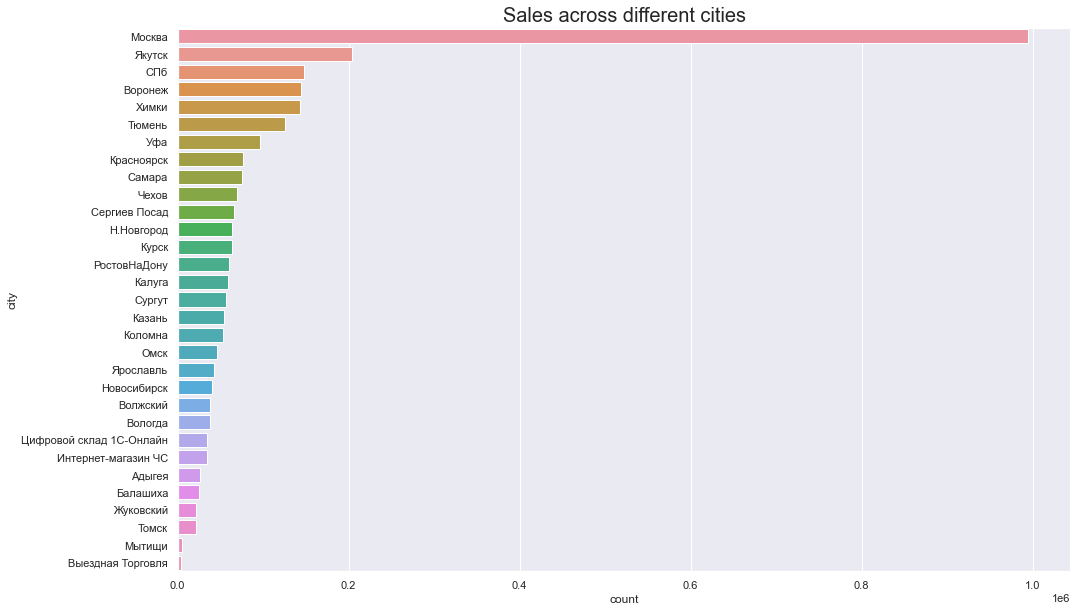

In [174]:
sales_merged['city'] = sales_merged['shop_name'].apply(lambda s: re.split(' (ТРЦ|ТЦ|ТК|ТРК|МТРЦ|\(|\"|ул)',s)[0])
sales_merged['city'].replace({'Якутск Орджоникидзе, 56': 'Якутск', 'Москва Магазин С21': 'Москва'}, inplace=True)

sns.set(rc={'figure.figsize':(16,10)})
sns.countplot(data=sales_merged, y="city", order = sales_merged['city'].value_counts().index);
plt.title('Sales across different cities', fontsize=20);

<AxesSubplot:xlabel='shop_id', ylabel='city'>

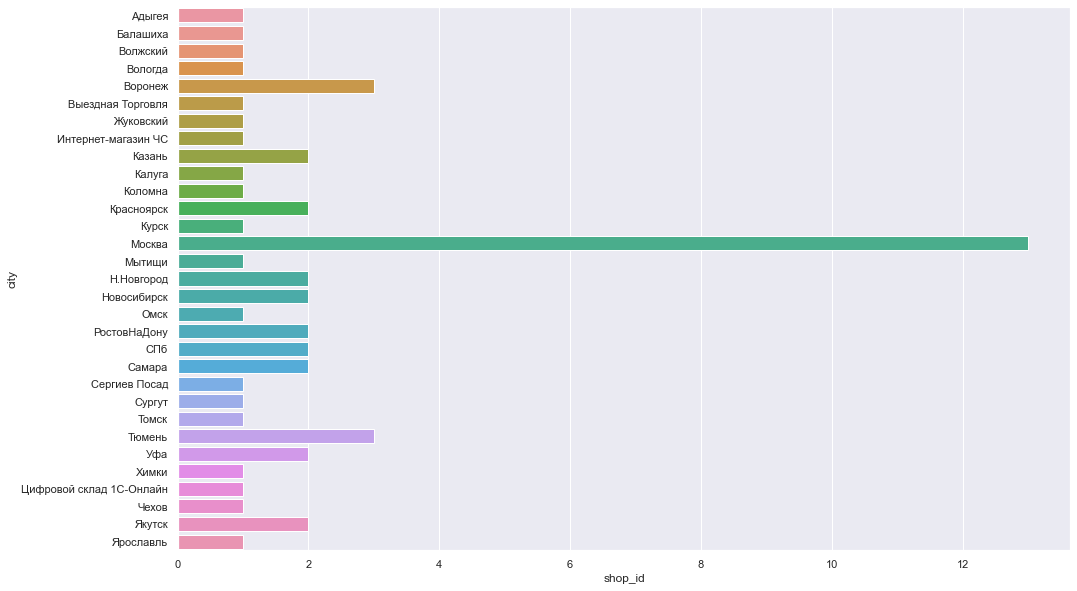

In [175]:
sns.barplot(data=sales_merged.groupby('city')['shop_id'].nunique().reset_index(),y='city', x='shop_id')
plt.title('Shops across different cities', fontsize=20);

Разных предметов слишком много, чтобы отобразить в одном графике, но можно рассмотреть категории. Можно заметить, что большинство категорий состоит из двух частей, разделенных дефисом, из которых первая - более глобальная.

In [113]:
item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


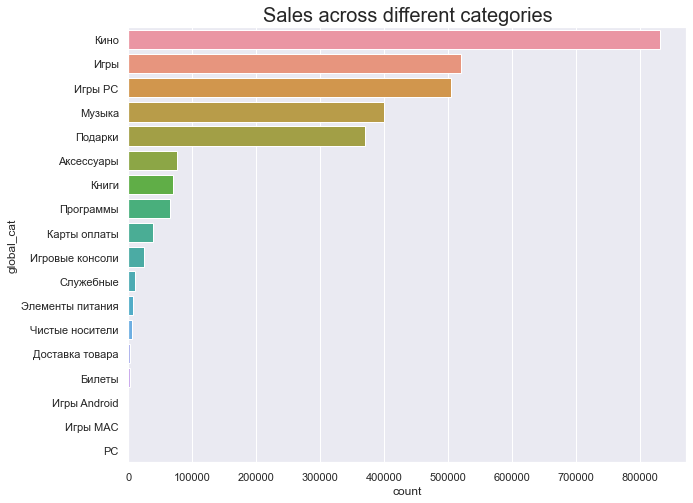

In [186]:
sales_merged['global_cat'] = sales_merged['item_category_name'].apply(lambda s: re.split(' (-|\()', s)[0])

sns.countplot(data=sales_merged, y="global_cat", order = sales_merged['global_cat'].value_counts().index);
plt.title('Sales across different categories', fontsize=20);

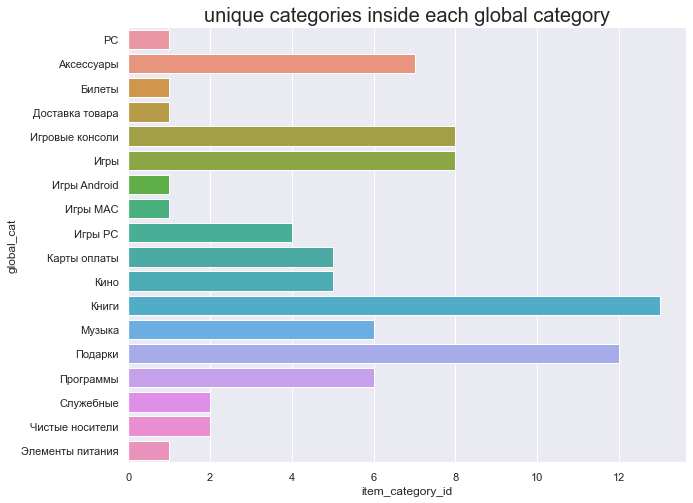

In [184]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(data=sales_merged.groupby('global_cat')['item_category_id'].nunique().reset_index(),y='global_cat', x='item_category_id')
plt.title('unique categories inside each global category', fontsize=20);

#### price and item count

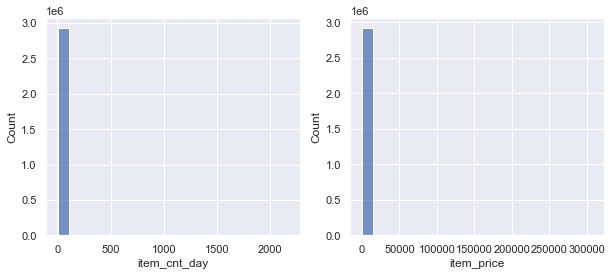

In [128]:
fig, axs = plt.subplots(ncols=2)
sns.set(rc={'figure.figsize':(10,4)})
sns.histplot(data=sales, x='item_cnt_day', bins=20, ax=axs[0]);
sns.histplot(data=sales, x='item_price', bins=20, ax=axs[1]);
sns.set(rc={'figure.figsize':(10,4)})

Из-за выбросов, которые решили не удалять на ETL, получаются такие нерепрезентативные графики, можно попробовать откинуть последние 1-2% значений.

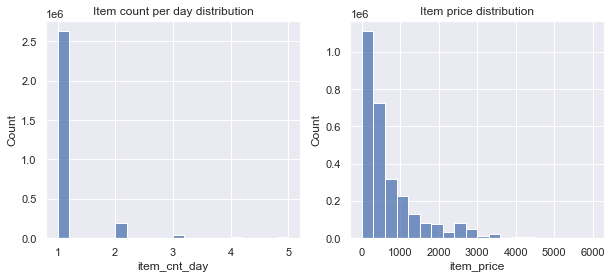

In [163]:
fig, axs = plt.subplots(ncols=2)
sns.set(rc={'figure.figsize':(10,4)})
sns.histplot(data=sales[sales['item_cnt_day'] <= sales['item_cnt_day'].quantile(.99)], x='item_cnt_day', bins=20, ax=axs[0]).set(title='Item count per day distribution');
sns.histplot(data=sales[sales['item_price'] <= sales['item_price'].quantile(.99)], x='item_price', bins=20, ax=axs[1]).set(title='Item price distribution');

### actually monthly sales

In [146]:
monthly_sales = sales.groupby(by=['date_block_num', 'shop_id', 'item_id']).sum().reset_index().drop(['item_price'], axis=1)
monthly_sales.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)

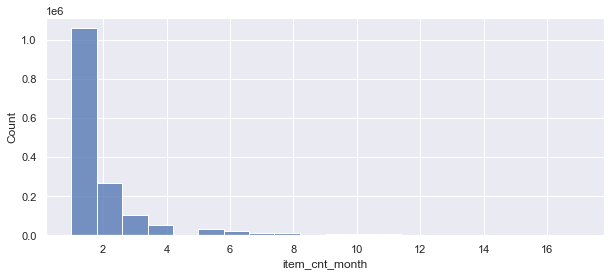

In [148]:
sns.histplot(data=monthly_sales[monthly_sales['item_cnt_month'] <= monthly_sales['item_cnt_month'].quantile(.99)], 
             x='item_cnt_month', bins=20);

In [164]:
sales_merged.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'month', 'year', 'day_of_week', 'shop_name',
       'item_name', 'item_category_id', 'item_category_name', 'city',
       'global_cat'],
      dtype='object')